In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
hong = pd.read_csv('../data/hongdae_1220.csv')
hong.head()

,년,월,date,day,time,승객유형,승객수,vac
0,2022,6,2022-06-01,일/공휴일,5,외국인,1.0,0
1,2022,6,2022-06-01,일/공휴일,5,우대권,97.0,0
2,2022,6,2022-06-01,일/공휴일,5,일반,1252.0,0
3,2022,6,2022-06-01,일/공휴일,5,청소년,46.0,0
4,2022,6,2022-06-01,일/공휴일,6,외국인,0.0,0


In [70]:
hong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58480 entries, 0 to 58479
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년       58480 non-null  int64  
 1   월       58480 non-null  int64  
 2   date    58480 non-null  object 
 3   day     58480 non-null  object 
 4   time    58480 non-null  int64  
 5   승객유형    58480 non-null  object 
 6   승객수     58480 non-null  float64
 7   vac     58480 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.6+ MB


In [71]:
hong_10=hong[hong['승객유형']=='청소년']

In [72]:
hong_10.head()

,년,월,date,day,time,승객유형,승객수,vac
3,2022,6,2022-06-01,일/공휴일,5,청소년,46.0,0
7,2022,6,2022-06-01,일/공휴일,6,청소년,40.0,0
11,2022,6,2022-06-01,일/공휴일,7,청소년,40.0,0
15,2022,6,2022-06-01,일/공휴일,8,청소년,75.0,0
19,2022,6,2022-06-01,일/공휴일,9,청소년,246.0,0


### 고등학교 학사 일정
- 여름방학: 7중순 ~ 8중순
- 겨울방학, 봄방학: 12말 ~ 2월말

- 요일 분류 변경
- 방학 기간 변경

In [73]:
hong_10.reset_index(drop=True)

,년,월,date,day,time,승객유형,승객수,vac
0,2022,6,2022-06-01,일/공휴일,5,청소년,46.0,0
1,2022,6,2022-06-01,일/공휴일,6,청소년,40.0,0
2,2022,6,2022-06-01,일/공휴일,7,청소년,40.0,0
3,2022,6,2022-06-01,일/공휴일,8,청소년,75.0,0
4,2022,6,2022-06-01,일/공휴일,9,청소년,246.0,0
...,...,...,...,...,...,...,...,...
14615,2024,5,2024-05-31,금,20,청소년,464.0,0
14616,2024,5,2024-05-31,금,21,청소년,560.0,0
14617,2024,5,2024-05-31,금,22,청소년,534.0,0
14618,2024,5,2024-05-31,금,23,청소년,252.0,0


In [74]:
hong_10.date = pd.to_datetime(hong_10.date)
hong_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14620 entries, 3 to 58479
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년       14620 non-null  int64         
 1   월       14620 non-null  int64         
 2   date    14620 non-null  datetime64[ns]
 3   day     14620 non-null  object        
 4   time    14620 non-null  int64         
 5   승객유형    14620 non-null  object        
 6   승객수     14620 non-null  float64       
 7   vac     14620 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.0+ MB


/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2161/3172939608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hong_10.date = pd.to_datetime(hong_10.date)


In [11]:
days=["월", "화", "수", "목", "금", "토", "일"]

hong_10['day']=hong_10['date'].dt.weekday.map(dict(enumerate(days)))

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2161/54499403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hong_10['day']=hong_10['date'].dt.weekday.map(dict(enumerate(days)))


In [12]:
hong_10

,년,월,date,day,time,승객유형,승객수,vac
3,2022,6,2022-06-01,수,5,청소년,46.0,0
7,2022,6,2022-06-01,수,6,청소년,40.0,0
11,2022,6,2022-06-01,수,7,청소년,40.0,0
15,2022,6,2022-06-01,수,8,청소년,75.0,0
19,2022,6,2022-06-01,수,9,청소년,246.0,0
...,...,...,...,...,...,...,...,...
58463,2024,5,2024-05-31,금,20,청소년,464.0,0
58467,2024,5,2024-05-31,금,21,청소년,560.0,0
58471,2024,5,2024-05-31,금,22,청소년,534.0,0
58475,2024,5,2024-05-31,금,23,청소년,252.0,0


In [75]:
hong_10['일'] = hong_10['date'].dt.day
hong_10.head()

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2161/1940217155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hong_10['일'] = hong_10['date'].dt.day


,년,월,date,day,time,승객유형,승객수,vac,일
3,2022,6,2022-06-01,일/공휴일,5,청소년,46.0,0,1
7,2022,6,2022-06-01,일/공휴일,6,청소년,40.0,0,1
11,2022,6,2022-06-01,일/공휴일,7,청소년,40.0,0,1
15,2022,6,2022-06-01,일/공휴일,8,청소년,75.0,0,1
19,2022,6,2022-06-01,일/공휴일,9,청소년,246.0,0,1


In [76]:
hong_10['vac'] = np.where(
    (hong_10['월'] == 7) & (hong_10['일'] >= 15) | (hong_10['월'] == 8) & (hong_10['일'] < 20) 
    | (1 <= hong_10['월']) & (hong_10['월'] <= 2) | (hong_10['월'] == 12) & (hong_10['일'] >= 24),
    1,
    0
)

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2161/3324901159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hong_10['vac'] = np.where(


In [15]:
hong_10[hong_10["vac"]==1]

,년,월,date,day,time,승객유형,승객수,vac,일
3523,2022,7,2022-07-15,금,5,청소년,24.0,1,15
3527,2022,7,2022-07-15,금,6,청소년,32.0,1,15
3531,2022,7,2022-07-15,금,7,청소년,228.0,1,15
3535,2022,7,2022-07-15,금,8,청소년,89.0,1,15
3539,2022,7,2022-07-15,금,9,청소년,139.0,1,15
...,...,...,...,...,...,...,...,...,...
51103,2024,2,2024-02-29,목,20,청소년,831.0,1,29
51107,2024,2,2024-02-29,목,21,청소년,765.0,1,29
51111,2024,2,2024-02-29,목,22,청소년,667.0,1,29
51115,2024,2,2024-02-29,목,23,청소년,238.0,1,29


In [77]:
# hong_10.drop('승객유형', axis=1, inplace=True)

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2161/1337859476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hong_10.drop('승객유형', axis=1, inplace=True)


In [17]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2161/1652792661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hong_10['day'] = pd.Categorical(hong_10['day'], categories=weekday_order, ordered=True)


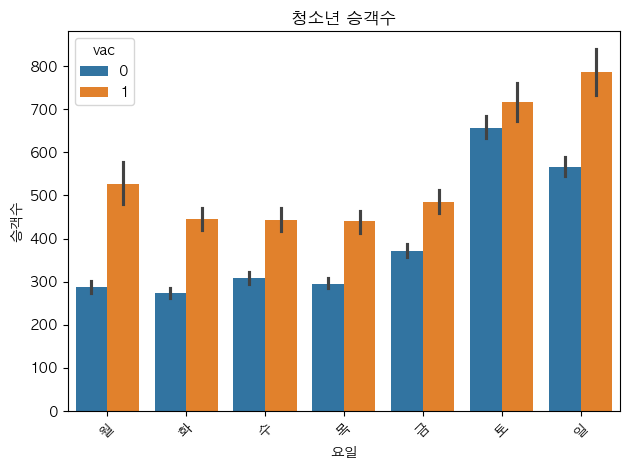

In [18]:
# 요일 순서 지정
weekday_order = ['월', '화', '수', '목', '금', '토', '일']

# day 컬럼을 카테고리형으로 변환하고 순서 지정
hong_10['day'] = pd.Categorical(hong_10['day'], categories=weekday_order, ordered=True)


sns.barplot(data=hong_10, x='day', y='승객수', hue='vac')

# 그래프 제목과 레이블 설정
plt.title('청소년 승객수')
plt.xlabel('요일')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

- 월-목: 방학일 때가 방학이 아닐 때에 비해 이용객 수가 많다.
- 금: 방학일 때는 월-목과 비슷하지만, 방학이 아닐 때는 월-목에 비해서 다소 증가한다.
- 토: 방학일 때와 방학이 아닐 때의 이용객 수 차이가 가장 적다.
- 일: 방학일 때는 오히려 토요일에 비해 이용객 수가 많고, 방학이 아닐 때는 그 반대이다. -> 공휴일은 방학이 아닌 기간에 더 많으므로 일/공휴일을 하나로 합치기

> 방학일 때와 아닐 때의 요일별 차이가 달라서 **월, 화수목, 금, 토, 일/공휴일** 5가지로 분류하였다.

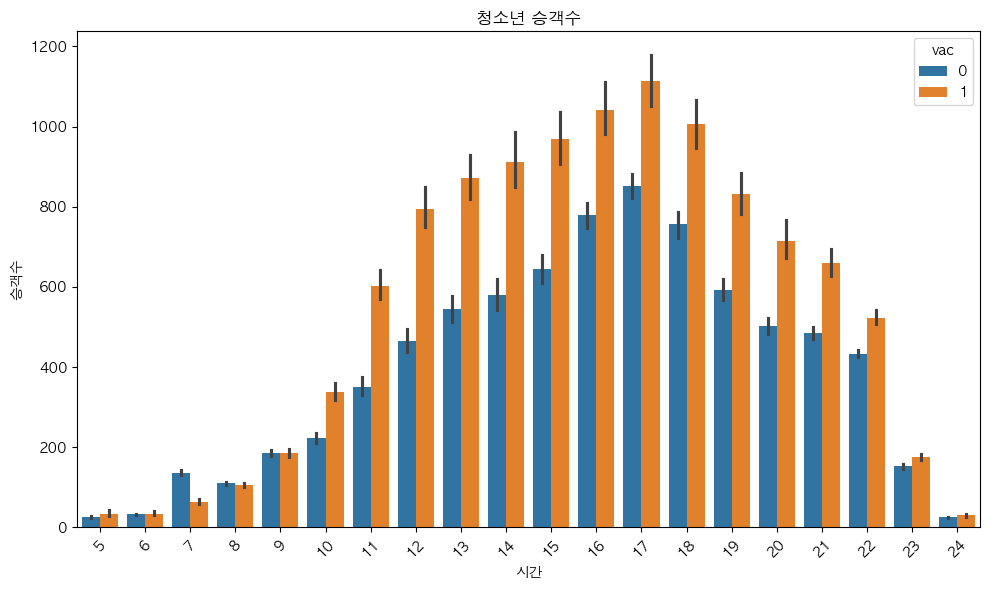

In [19]:
plt.figure(figsize=(10, 6))

# 동일한 축에 두 그래프 그리기
ax = plt.gca()
sns.barplot(data=hong_10, x='time', y='승객수', hue='vac', ax=ax)
# sns.lineplot(data=hong_10, x='time', y='승객수', hue='vac', marker='o', ax=ax)

# 그래프 제목과 레이블 설정
plt.title('청소년 승객수')
plt.xlabel('시간')
plt.ylabel('승객수')

plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()


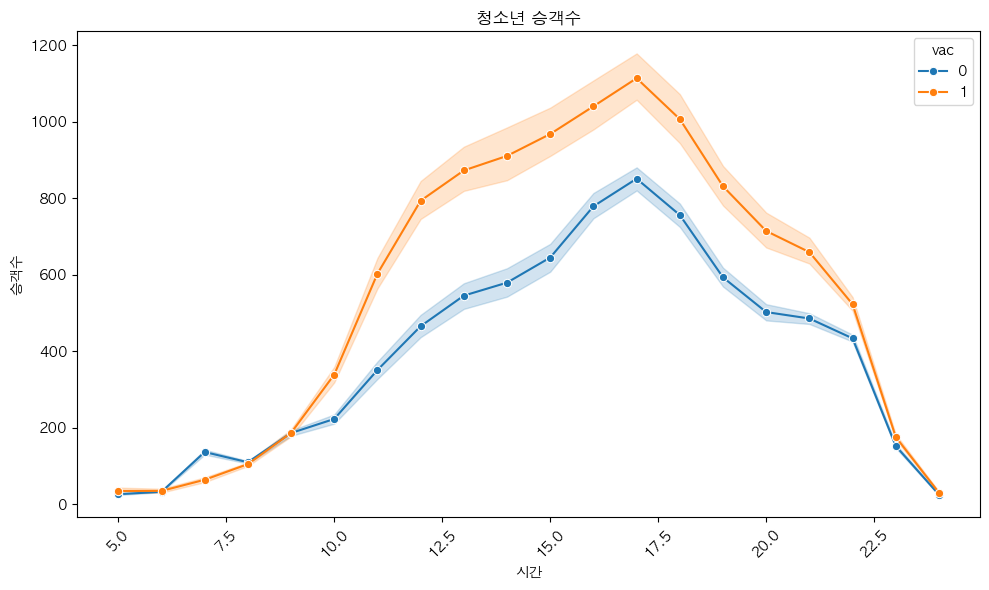

In [20]:
plt.figure(figsize=(10, 6))

# 동일한 축에 두 그래프 그리기
ax = plt.gca()
sns.lineplot(data=hong_10, x='time', y='승객수', hue='vac', marker='o', ax=ax)

# 그래프 제목과 레이블 설정
plt.title('청소년 승객수')
plt.xlabel('시간')
plt.ylabel('승객수')

plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

> 방학일 때와 아닐 때의 시간대별 이용객 수 양상이 고르다.

In [78]:
days_10=["평일", "평일", "평일", "평일", "금", "토", "일"]

hong_10['day']=hong_10['date'].dt.weekday.map(dict(enumerate(days_10)))

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2161/1419995762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hong_10['day']=hong_10['date'].dt.weekday.map(dict(enumerate(days_10)))


In [79]:
import holidays
# 대한민국 공휴일 불러오기
kr_holidays = holidays.KR(years=range(2022,2024))

# 요일 데이터 업데이트 함수 정의
def update_holiday(row):
    if row['date'] in kr_holidays or row['day'] == '일':
        return '일/공휴일'
    else:
        return row['day']  # 기존 요일 값 유지
    
# 데이터프레임에 함수 적용
hong_10['day'] = hong_10.apply(update_holiday, axis=1)

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2161/37096122.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hong_10['day'] = hong_10.apply(update_holiday, axis=1)


In [80]:
hong_10.head(50)

,년,월,date,day,time,승객수,vac,일
3,2022,6,2022-06-01,일/공휴일,5,46.0,0,1
7,2022,6,2022-06-01,일/공휴일,6,40.0,0,1
11,2022,6,2022-06-01,일/공휴일,7,40.0,0,1
15,2022,6,2022-06-01,일/공휴일,8,75.0,0,1
19,2022,6,2022-06-01,일/공휴일,9,246.0,0,1
23,2022,6,2022-06-01,일/공휴일,10,383.0,0,1
27,2022,6,2022-06-01,일/공휴일,11,958.0,0,1
31,2022,6,2022-06-01,일/공휴일,12,1087.0,0,1
35,2022,6,2022-06-01,일/공휴일,13,1112.0,0,1
39,2022,6,2022-06-01,일/공휴일,14,1340.0,0,1


In [81]:
day_map = {'평일':0, '금':1, '토':2, '일/공휴일':3}
hong_10['day']=hong_10['day'].map(day_map)

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2161/2152215327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hong_10['day']=hong_10['day'].map(day_map)


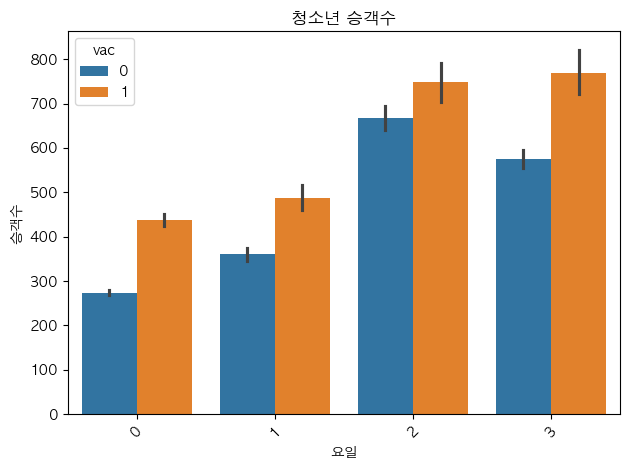

In [25]:
sns.barplot(data=hong_10, x='day', y='승객수', hue='vac')

# 그래프 제목과 레이블 설정
plt.title('청소년 승객수')
plt.xlabel('요일')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

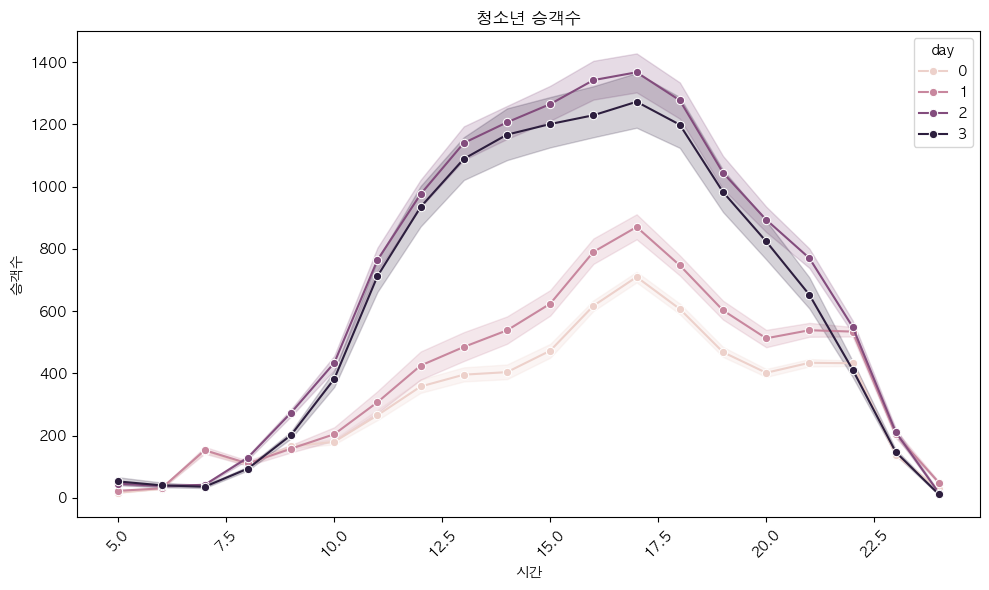

In [26]:
plt.figure(figsize=(10, 6))

# 동일한 축에 두 그래프 그리기
ax = plt.gca()
sns.lineplot(data=hong_10, x='time', y='승객수', hue='day', marker='o', ax=ax)

# 그래프 제목과 레이블 설정
plt.title('청소년 승객수')
plt.xlabel('시간')
plt.ylabel('승객수')

plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

---

In [89]:
hong_for=hong[hong['승객유형']=='외국인']
hong_for.head()

,년,월,date,day,time,승객유형,승객수,vac
0,2022,6,2022-06-01,일/공휴일,5,외국인,1.0,0
4,2022,6,2022-06-01,일/공휴일,6,외국인,0.0,0
8,2022,6,2022-06-01,일/공휴일,7,외국인,1.0,0
12,2022,6,2022-06-01,일/공휴일,8,외국인,0.0,0
16,2022,6,2022-06-01,일/공휴일,9,외국인,3.0,0


- vac 컬럼 제거
- 요일 분류 변경

In [86]:
hong_for=hong_for[hong_for['년']>=2023]
hong_for.head()

,년,월,date,day,time,승객유형,승객수,vac
17120,2023,1,2023-01-01,일/공휴일,5,외국인,41.0,1
17124,2023,1,2023-01-01,일/공휴일,6,외국인,21.0,1
17128,2023,1,2023-01-01,일/공휴일,7,외국인,10.0,1
17132,2023,1,2023-01-01,일/공휴일,8,외국인,25.0,1
17136,2023,1,2023-01-01,일/공휴일,9,외국인,17.0,1


In [90]:
hong_for.reset_index(drop=True)

,년,월,date,day,time,승객유형,승객수,vac
0,2022,6,2022-06-01,일/공휴일,5,외국인,1.0,0
1,2022,6,2022-06-01,일/공휴일,6,외국인,0.0,0
2,2022,6,2022-06-01,일/공휴일,7,외국인,1.0,0
3,2022,6,2022-06-01,일/공휴일,8,외국인,0.0,0
4,2022,6,2022-06-01,일/공휴일,9,외국인,3.0,0
...,...,...,...,...,...,...,...,...
14615,2024,5,2024-05-31,금,20,외국인,140.0,0
14616,2024,5,2024-05-31,금,21,외국인,127.0,0
14617,2024,5,2024-05-31,금,22,외국인,130.0,0
14618,2024,5,2024-05-31,금,23,외국인,95.0,0


In [91]:
hong_for.date = pd.to_datetime(hong_for.date)
days=["월", "화", "수", "목", "금", "토", "일"]

hong_for['day']=hong_for['date'].dt.weekday.map(dict(enumerate(days)))

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2161/1302782216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hong_for.date = pd.to_datetime(hong_for.date)
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2161/1302782216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hong_for['day']=hong_for['date'].dt.weekday.map(dict(enumerate(days)))


In [92]:
hong_for.head()

,년,월,date,day,time,승객유형,승객수,vac
0,2022,6,2022-06-01,수,5,외국인,1.0,0
4,2022,6,2022-06-01,수,6,외국인,0.0,0
8,2022,6,2022-06-01,수,7,외국인,1.0,0
12,2022,6,2022-06-01,수,8,외국인,0.0,0
16,2022,6,2022-06-01,수,9,외국인,3.0,0


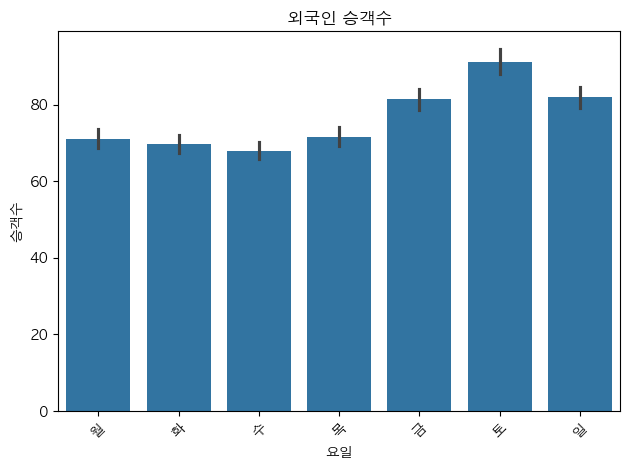

In [32]:
# day 컬럼을 카테고리형으로 변환하고 순서 지정
hong_for['day'] = pd.Categorical(hong_for['day'], categories=weekday_order, ordered=True)


sns.barplot(data=hong_for, x='day', y='승객수')

# 그래프 제목과 레이블 설정
plt.title('외국인 승객수')
plt.xlabel('요일')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

> 요일은 월-목, 금/일, 토 3가지로 분류  
> 한국 공휴일은 추가 X

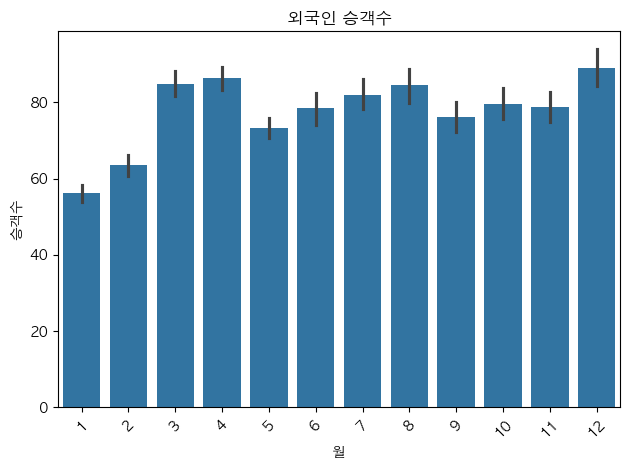

In [33]:
sns.barplot(data=hong_for, x='월', y='승객수')

# 그래프 제목과 레이블 설정
plt.title('외국인 승객수')
plt.xlabel('월')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

- 국제 행사 데이터는 정리된 것 X
- 비정기적 국제 행사가 있던 올해 3-4월 데이터만 가지고 월별 분류를 하기엔 무리
- 2023, 2024 1-2월에는 확실히 이용객 수가 적지만, 나머지의 월별을 분리하기에는 표본이 많지 않아 패턴화하기가 어렵다.
- 2023과 2024에는 12월 이용객 수가 많았다.

> 1-2, 3-11, 12 3가지로 분류

- 1-2: 0
- 3-11: 1
- 12: 2

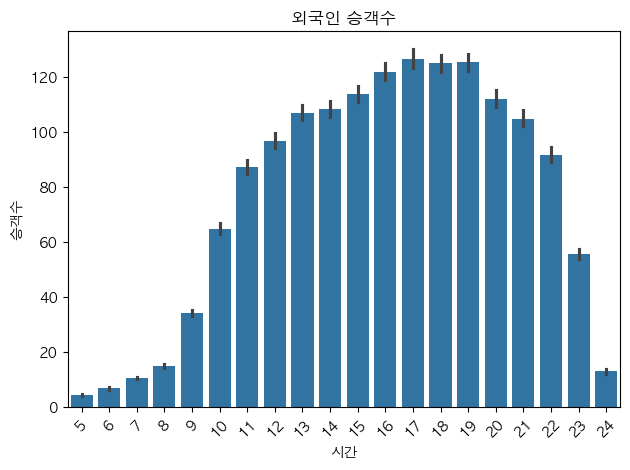

In [34]:
sns.barplot(data=hong_for, x='time', y='승객수')

# 그래프 제목과 레이블 설정
plt.title('외국인 승객수')
plt.xlabel('시간')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

In [35]:
days_for=["평일", "평일", "평일", "평일", "금/일", "토", "금/일"]

hong_for['day']=hong_for['date'].dt.weekday.map(dict(enumerate(days_for)))

In [36]:
hong_for['season'] = hong_for['월'].apply(
    lambda x: 0 if  1 <= x <=2 
    else 1 if 3 <= x <= 11
    else 2
)

In [37]:
hong_for.head()

,년,월,date,day,time,승객유형,승객수,vac,season
17120,2023,1,2023-01-01,금/일,5,외국인,41.0,1,0
17124,2023,1,2023-01-01,금/일,6,외국인,21.0,1,0
17128,2023,1,2023-01-01,금/일,7,외국인,10.0,1,0
17132,2023,1,2023-01-01,금/일,8,외국인,25.0,1,0
17136,2023,1,2023-01-01,금/일,9,외국인,17.0,1,0


In [38]:
day_map = {'평일':0, '금/일':1, '토':2}
hong_for['day']=hong_for['day'].map(day_map)
hong_for.head()

,년,월,date,day,time,승객유형,승객수,vac,season
17120,2023,1,2023-01-01,1,5,외국인,41.0,1,0
17124,2023,1,2023-01-01,1,6,외국인,21.0,1,0
17128,2023,1,2023-01-01,1,7,외국인,10.0,1,0
17132,2023,1,2023-01-01,1,8,외국인,25.0,1,0
17136,2023,1,2023-01-01,1,9,외국인,17.0,1,0


In [39]:
hong_for.drop(['date', '승객유형'],axis=1,inplace=True)

In [40]:
hong_for.drop('vac',axis=1,inplace=True)

In [41]:
hong_for.head()

,년,월,day,time,승객수,season
17120,2023,1,1,5,41.0,0
17124,2023,1,1,6,21.0,0
17128,2023,1,1,7,10.0,0
17132,2023,1,1,8,25.0,0
17136,2023,1,1,9,17.0,0


In [42]:
hong_10.drop(['date', '일'],axis=1,inplace=True)

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2161/2891081037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hong_10.drop(['date', '일'],axis=1,inplace=True)


In [43]:
hong_10.head()

,년,월,day,time,승객유형,승객수,vac
3,2022,6,3,5,청소년,46.0,0
7,2022,6,3,6,청소년,40.0,0
11,2022,6,3,7,청소년,40.0,0
15,2022,6,3,8,청소년,75.0,0
19,2022,6,3,9,청소년,246.0,0


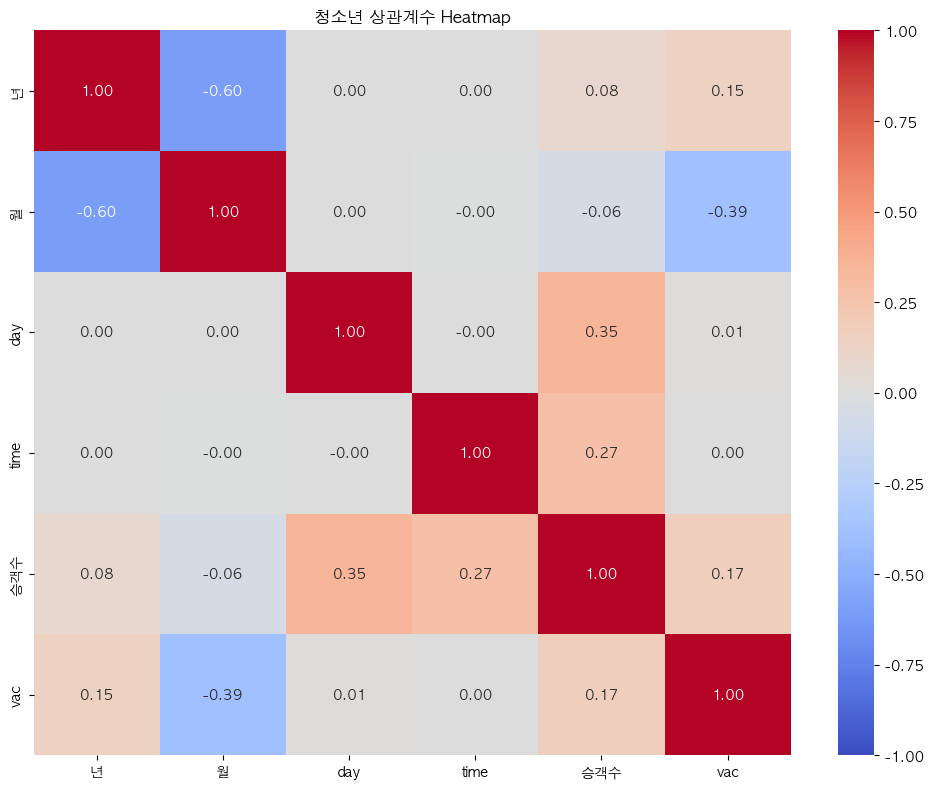

In [44]:
corr_matrix=hong_10.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,      # 각 셀에 숫자 표시
            cmap='coolwarm', # 색상 팔레트
            center=0,        # 0을 중심으로 색상 설정
            vmin=-1, 
            vmax=1,
            fmt='.2f')
plt.title('청소년 상관계수 Heatmap')
plt.tight_layout()
plt.show()

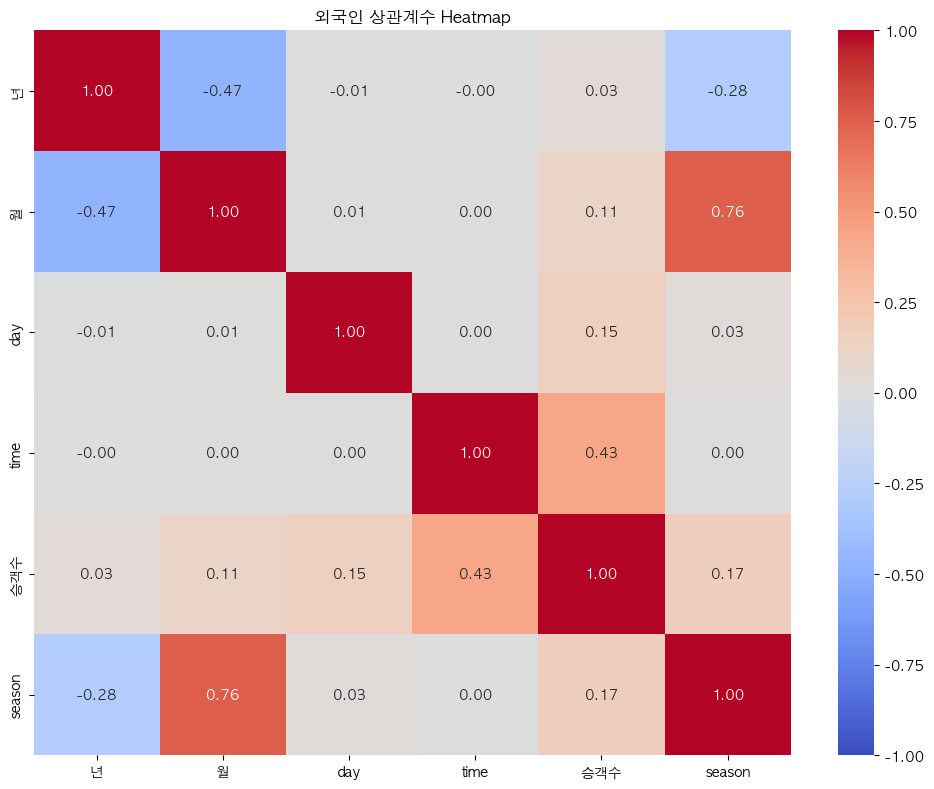

In [45]:
corr_matrix=hong_for.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,      # 각 셀에 숫자 표시
            cmap='coolwarm', # 색상 팔레트
            center=0,        # 0을 중심으로 색상 설정
            vmin=-1, 
            vmax=1,
            fmt='.2f')
plt.title('외국인 상관계수 Heatmap')
plt.tight_layout()
plt.show()

---
### Modeling

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor

In [48]:
hong10_x = hong_10[['년','월','day','time','vac']]
hong10_y = hong_10['승객수']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    hong10_x, 
    hong10_y, 
    test_size=0.2, 
    random_state=42
)

### 청소년

In [50]:
rf=RandomForestRegressor(n_estimators=100)

rf.fit(X_train,y_train)
print('Train score:',rf.score(X_train,y_train))
print('Test score:',rf.score(X_test,y_test))

Train score: 0.9105807578220341
Test score: 0.8377185735099171


In [51]:
# Decision Tree
dt_model = DecisionTreeRegressor()

# Gradient Boosting
gb_model = GradientBoostingRegressor()

# Gaussian Process
gpr_model = GaussianProcessRegressor()

# K-Neighbors
knn_model = KNeighborsRegressor()

# Extra Trees
et_model = ExtraTreesRegressor()

In [52]:
dt_model.fit(X_train, y_train)
print('Train score:',dt_model.score(X_train,y_train))
print('Test score:',dt_model.score(X_test,y_test))

Train score: 0.9118788029661076
Test score: 0.7980791958542304


In [53]:
gb_model.fit(X_train, y_train)
print('Train score:',gb_model.score(X_train,y_train))
print('Test score:',gb_model.score(X_test,y_test))

Train score: 0.8474497761960073
Test score: 0.8663524035359442


In [54]:
gpr_model.fit(X_train, y_train)
print('Train score:',gpr_model.score(X_train,y_train))
print('Test score:',gpr_model.score(X_test,y_test))

Train score: 0.9118788027091127
Test score: 0.7945083017391643


In [55]:
et_model.fit(X_train, y_train)
print('Train score:',et_model.score(X_train,y_train))
print('Test score:',et_model.score(X_test,y_test))

Train score: 0.9118788021413272
Test score: 0.8010571386786134


In [56]:
knn_model.fit(X_train, y_train)
print('Train score:',knn_model.score(X_train,y_train))
print('Test score:',knn_model.score(X_test,y_test))

Train score: 0.8801569604277693
Test score: 0.850488130638895


### 외국인

In [57]:
# hongfor_x = hong_for[['년','월','day','time']]
hongfor_x = hong_for[['년','season','day','time']]
hongfor_y = hong_for['승객수']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    hongfor_x, 
    hongfor_y, 
    test_size=0.2, 
    random_state=42
)

In [59]:
rf=RandomForestRegressor(n_estimators=100)

rf.fit(X_train,y_train)
print('Train score:',rf.score(X_train,y_train))
print('Test score:',rf.score(X_test,y_test))

Train score: 0.8152867689194042
Test score: 0.7924022161063108


In [60]:
dt_model.fit(X_train, y_train)
print('Train score:',dt_model.score(X_train,y_train))
print('Test score:',dt_model.score(X_test,y_test))

Train score: 0.8153877267355822
Test score: 0.7925759819068248


In [61]:
gb_model.fit(X_train, y_train)
print('Train score:',gb_model.score(X_train,y_train))
print('Test score:',gb_model.score(X_test,y_test))

Train score: 0.8103667759712805
Test score: 0.8022114866190972


In [62]:
gpr_model.fit(X_train, y_train)
print('Train score:',gpr_model.score(X_train,y_train))
print('Test score:',gpr_model.score(X_test,y_test))

Train score: 0.8153877218827037
Test score: 0.7925791548541748


In [63]:
et_model.fit(X_train, y_train)
print('Train score:',et_model.score(X_train,y_train))
print('Test score:',et_model.score(X_test,y_test))

Train score: 0.8153877267355822
Test score: 0.7925759819068248


In [64]:
knn_model.fit(X_train, y_train)
print('Train score:',knn_model.score(X_train,y_train))
print('Test score:',knn_model.score(X_test,y_test))

Train score: 0.78423499581141
Test score: 0.7665253465266182


---
### 이상치 확인 및 처리

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

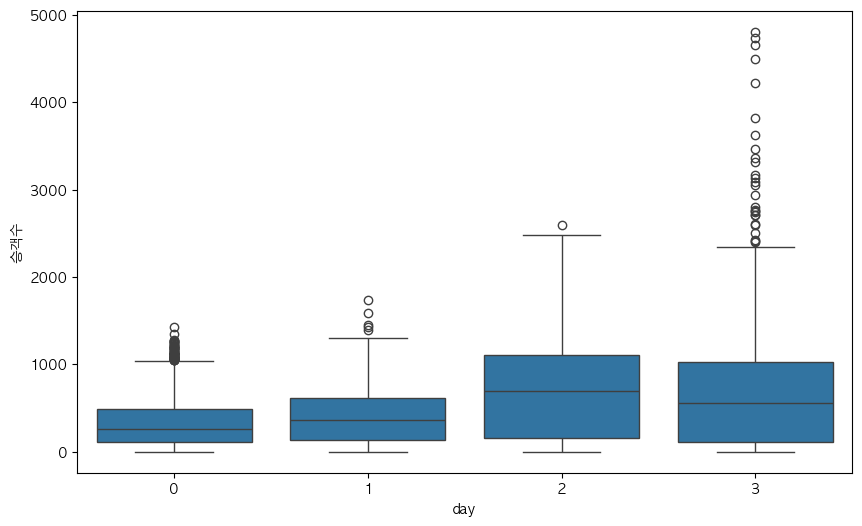

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x=hong_10['day'], y=hong_10['승객수'])
plt.show()

In [68]:
hong_10.head()

,년,월,day,time,승객유형,승객수,vac
3,2022,6,3,5,청소년,46.0,0
7,2022,6,3,6,청소년,40.0,0
11,2022,6,3,7,청소년,40.0,0
15,2022,6,3,8,청소년,75.0,0
19,2022,6,3,9,청소년,246.0,0


### 데이터 저장

In [82]:
hong_10.to_csv('../data/hong_10.csv', index=False)

In [83]:
check = pd.read_csv('../data/hong_10.csv')

In [84]:
check.head()

,년,월,date,day,time,승객수,vac,일
0,2022,6,2022-06-01,3,5,46.0,0,1
1,2022,6,2022-06-01,3,6,40.0,0,1
2,2022,6,2022-06-01,3,7,40.0,0,1
3,2022,6,2022-06-01,3,8,75.0,0,1
4,2022,6,2022-06-01,3,9,246.0,0,1


In [93]:
hong_for.to_csv('../data/hong_for.csv', index=False)
check = pd.read_csv('../data/hong_for.csv')
check.head()

,년,월,date,day,time,승객유형,승객수,vac
0,2022,6,2022-06-01,수,5,외국인,1.0,0
1,2022,6,2022-06-01,수,6,외국인,0.0,0
2,2022,6,2022-06-01,수,7,외국인,1.0,0
3,2022,6,2022-06-01,수,8,외국인,0.0,0
4,2022,6,2022-06-01,수,9,외국인,3.0,0
